<a href="https://colab.research.google.com/github/Raulledea/Aprendiendo_Web/blob/main/Ra%C3%BAl_Alejandro_Ledea_Cruz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importar librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [2]:
#Configurar Kaggle API en Colab
import os
kaggle_json = """
{
  "username": "ralledea",
  "key": "908febaf6c91fe80fde80163dba03391"
}
"""
os.makedirs("/root/.kaggle", exist_ok=True)
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(kaggle_json.strip())
os.chmod("/root/.kaggle/kaggle.json", 600)



In [3]:
# Descargar y descomprimir dataset
!kaggle datasets download -d harishkumardatalab/housing-price-prediction -p /content
!unzip -o /content/housing-price-prediction.zip -d /content


Dataset URL: https://www.kaggle.com/datasets/harishkumardatalab/housing-price-prediction
License(s): CC0-1.0
  0% 0.00/4.63k [00:00<?, ?B/s]
100% 4.63k/4.63k [00:00<00:00, 4.49MB/s]
Archive:  /content/housing-price-prediction.zip
  inflating: /content/Housing.csv    


In [28]:
# Carga el archivo CSV y muestra un resumen compacto
df = pd.read_csv("/content/Housing.csv")
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")
display(df.head())
print("\nTipos de datos:")
print(df.dtypes)
print("\nValores nulos por columna:")
print(df.isnull().sum()[df.isnull().sum() > 0])



Filas: 545, Columnas: 13


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished



Tipos de datos:
price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

Valores nulos por columna:
Series([], dtype: int64)


In [29]:
# Elimina columnas irrelevantes si existen
cols_to_drop = []
df.drop(columns=cols_to_drop, inplace=True)

# Imputa valores faltantes en columnas numéricas con la mediana
num_cols = df.select_dtypes(include=[np.number]).columns
imputer_num = SimpleImputer(strategy='median')
df[num_cols] = imputer_num.fit_transform(df[num_cols])

# Imputa valores faltantes en columnas categóricas con la moda
cat_cols = df.select_dtypes(exclude=[np.number]).columns
imputer_cat = SimpleImputer(strategy='most_frequent')
df[cat_cols] = imputer_cat.fit_transform(df[cat_cols])

# Convierte columnas categóricas a tipo string
for col in df.columns:
    if col in cat_cols:
        df[col] = df[col].astype(str)




In [31]:
# Recorta outliers en la variable 'price' usando el percentil 99
q_high_price = df['price'].quantile(0.99)
df = df[df['price'] <= q_high_price]

# Recorta outliers en la variable 'area' usando el percentil 99
q_high_area = df['area'].quantile(0.99)
df = df[df['area'] <= q_high_area]




In [33]:
# Crea variables derivadas
df['multi_story'] = (df['stories'] > 2).astype(int)  # 1 si tiene más de 2 pisos
df['high_price'] = (df['price'] > df['price'].median()).astype(int)  # 1 si el precio está por encima de la mediana

# Codifica variables categóricas
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])



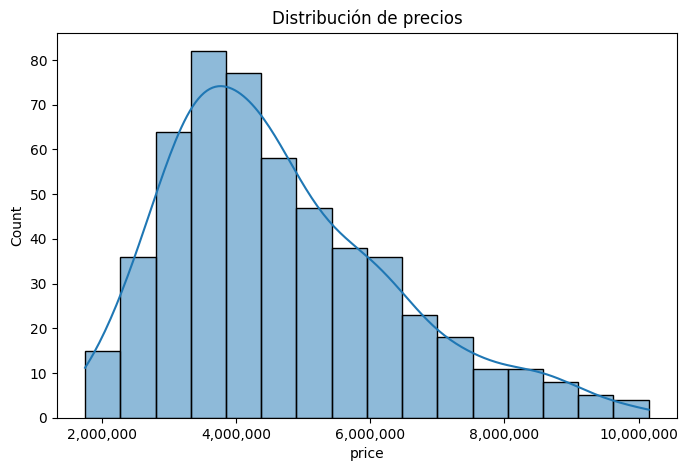

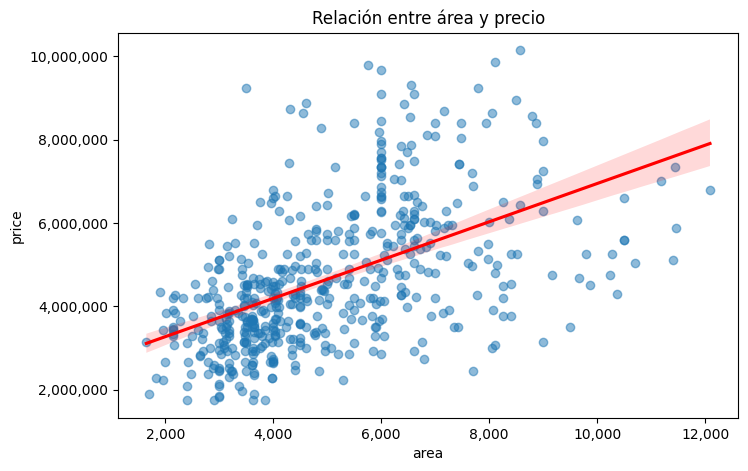

In [34]:
# Gráfica de histograma para la distribución de precios (valores originales)
plt.figure(figsize=(8,5))
sns.histplot(df['price'], kde=True)
plt.title("Distribución de precios")
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))  # Formato con separador de miles
plt.show()

# Gráfica de dispersión para relación entre área y precio (valores originales)
plt.figure(figsize=(8,5))
sns.regplot(x='area', y='price', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Relación entre área y precio")
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{int(y):,}'))  # Formato con separador de miles
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()
